# Exploratory Data Analysis - Delhi House Rent Prediction

This notebook performs exploratory data analysis on the cleaned house rent dataset.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Load the cleaned dataset
df = pd.read_csv("../data/interim/cleaned_house_data_v1.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (17890, 5)


,size_sq_ft,propertyType,bedrooms,localityName,price
0,400,Independent Floor,1,Swasthya Vihar,9000
1,1050,Apartment,2,mayur vihar phase 1,20000
2,2250,Independent Floor,2,Swasthya Vihar,28000
3,1350,Independent Floor,2,Krishna Nagar,28000
4,450,Apartment,2,New Ashok Nagar,12500


## 1. Data Overview and Structure

In [ ]:
# Check data types and basic information
df.info()

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

# Display only columns with missing values, if any
if missing_df['Missing Values'].sum() > 0:
    print("Columns with missing values:")
    display(missing_df[missing_df['Missing Values'] > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


## 2. Statistical Summary

In [5]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size_sq_ft,17890.0,1176.342091,873.751044,100.0,620.0,900.0,1600.0,16521.0
bedrooms,17890.0,2.168865,0.971414,1.0,1.0,2.0,3.0,15.0
price,17890.0,33451.955282,88020.544717,1200.0,13500.0,22000.0,35000.0,5885646.0


In [6]:
# For categorical columns, check value counts
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col} - Value Counts:")
    display(df[col].value_counts().head(10))
    print(f"Number of unique values: {df[col].nunique()}")


propertyType - Value Counts:


Independent Floor    11218
Apartment             5725
Independent House      896
Villa                   51
Name: propertyType, dtype: int64

Number of unique values: 4

localityName - Value Counts:


Patel Nagar            1448
Paschim Vihar           949
Chattarpur              826
Pitampura               609
mayur vihar phase 1     523
New Ashok Nagar         439
Malviya Nagar           365
laxmi nagar             325
Rajinder Nagar          310
Uttam Nagar             299
Name: localityName, dtype: int64

Number of unique values: 781


## 3. Distribution Analysis

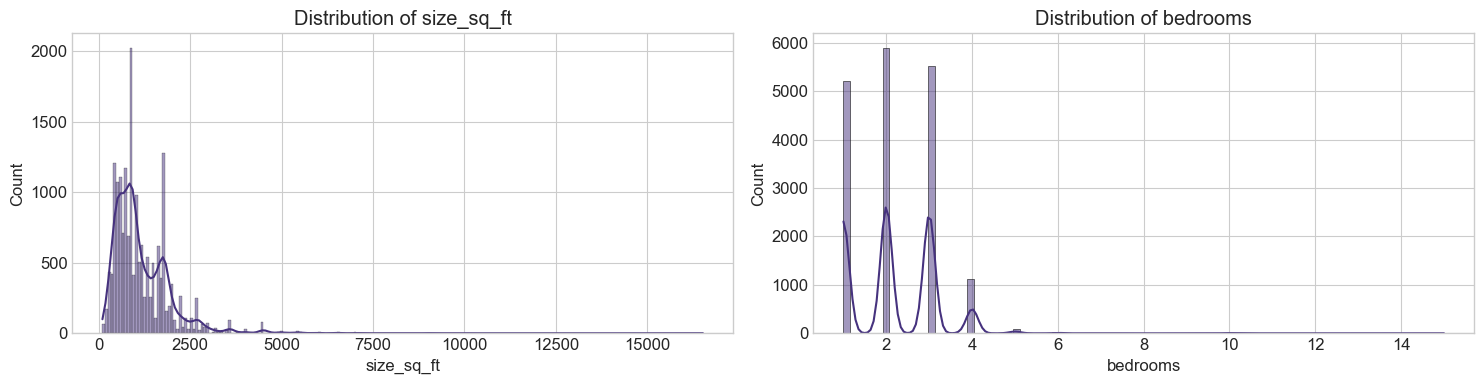

In [10]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'price' and df[col].nunique() > 5]

if len(numerical_cols) > 0:
    # Create subplots for histograms
    n_cols = 2
    n_rows = (len(numerical_cols) + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

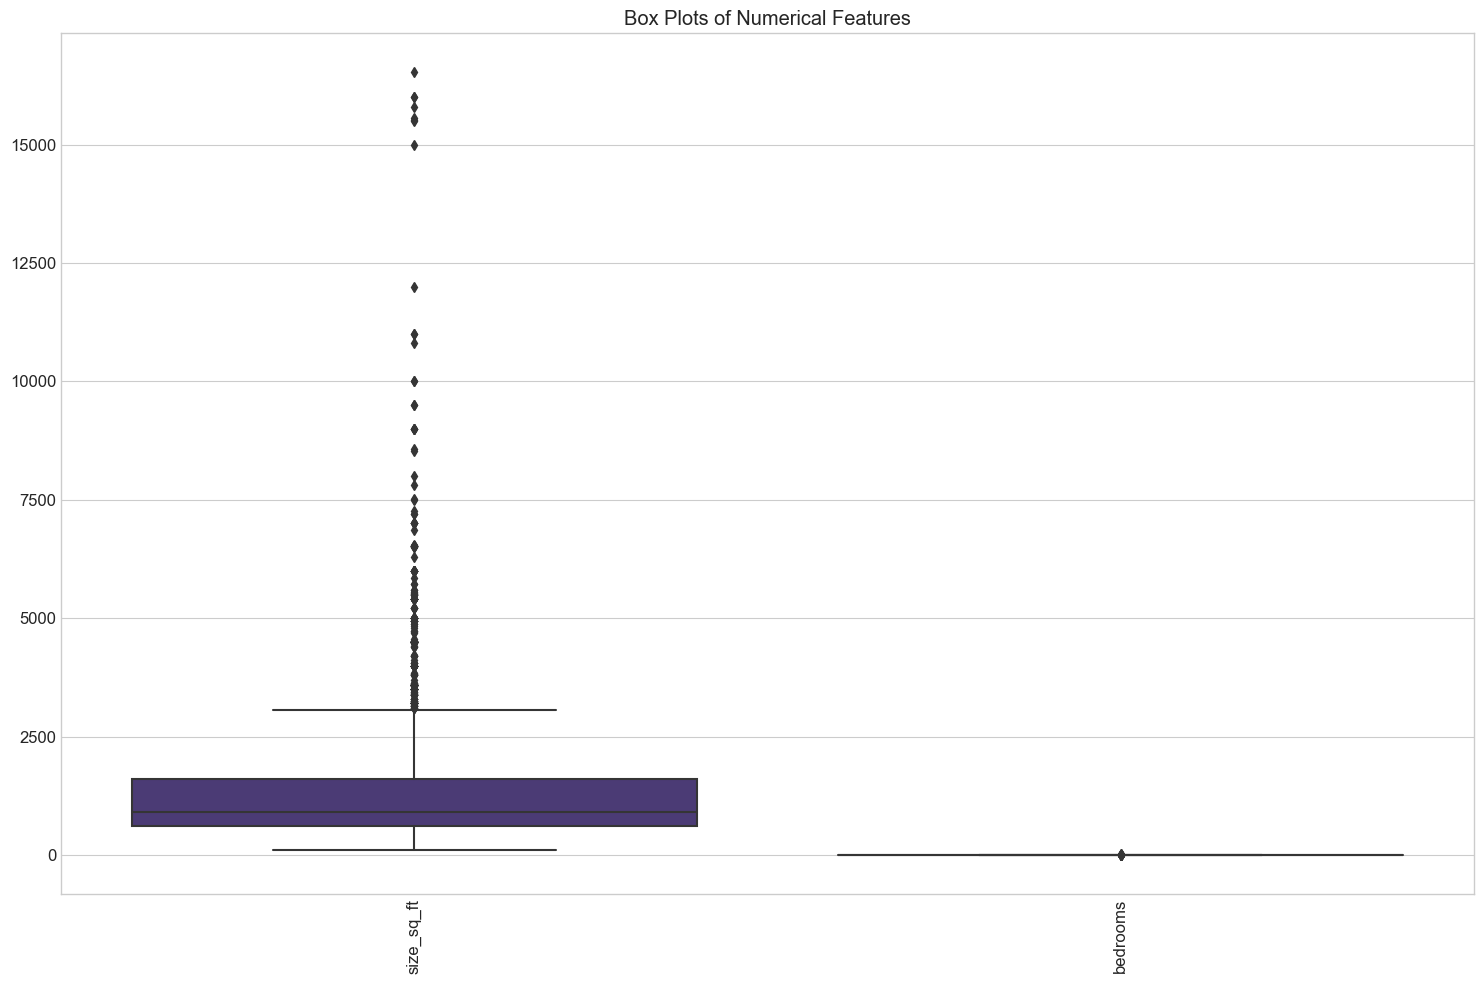

In [14]:
# Box plots to identify outliers in numerical features
if len(numerical_cols) > 0:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[numerical_cols])
    plt.title('Box Plots of Numerical Features')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 4. Categorical Features Analysis

/var/folders/72/j2v47ktn0snb0mwv96qy74p80000gn/T/ipykernel_31444/1776972215.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=df, estimator=np.mean, ci=None)


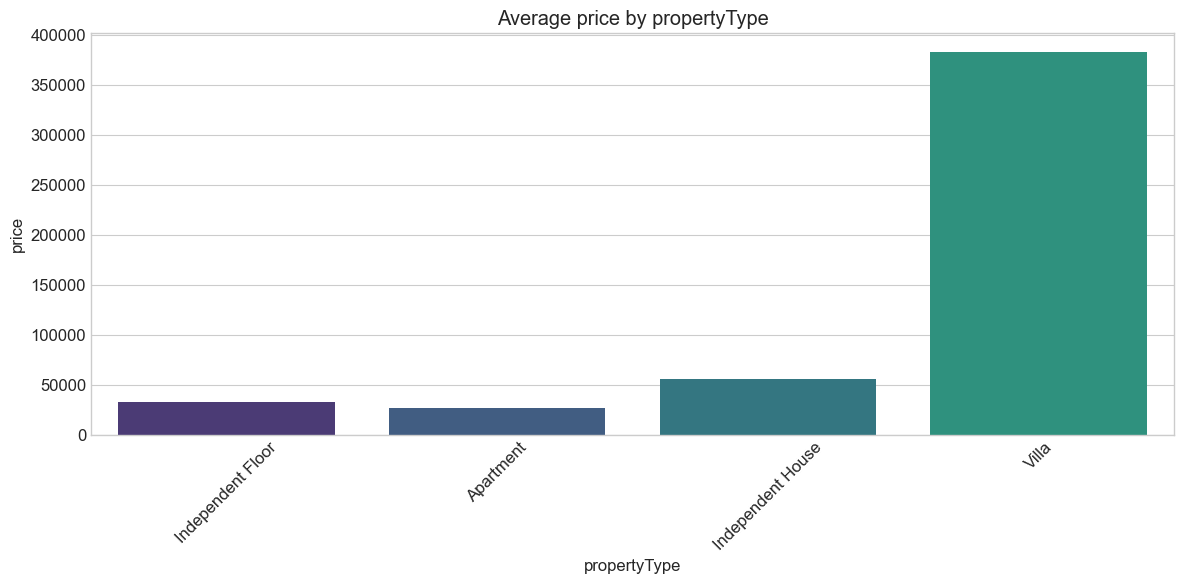

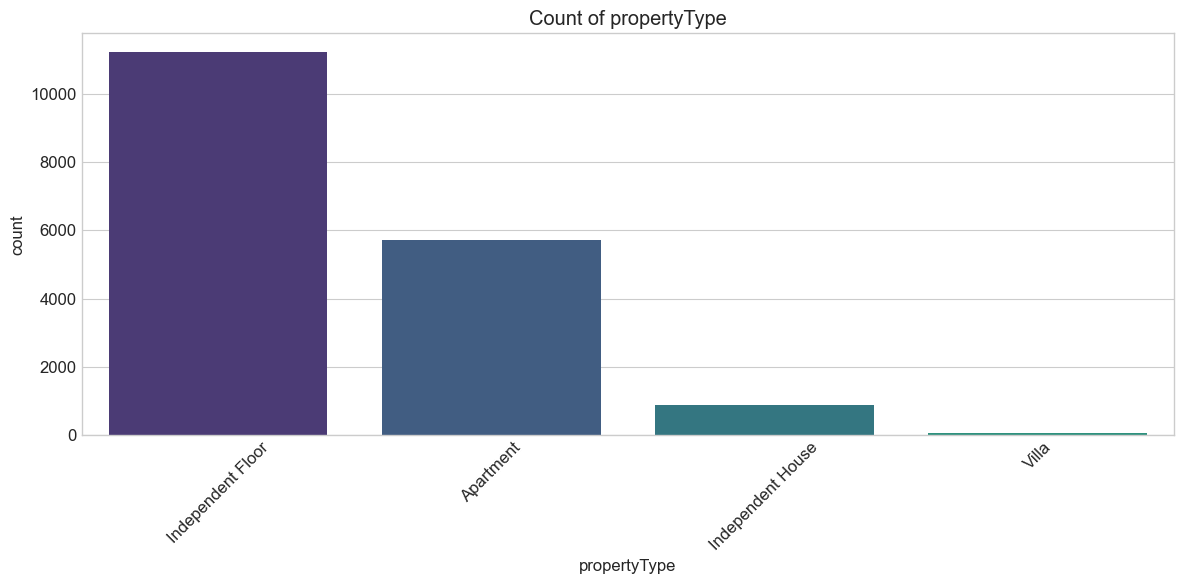

In [13]:
# Analyze categorical features in relation to rent
if 'price' in df.columns and len(categorical_cols) > 0:
    for col in categorical_cols:
        if df[col].nunique() < 15:  # Only plot if there aren't too many categories
            plt.figure(figsize=(12, 6))
            
            # Bar plot of average rent by category
            sns.barplot(x=col, y='price', data=df, estimator=np.mean, ci=None)
            plt.title(f'Average price by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Count plot to show distribution of categories
            plt.figure(figsize=(12, 6))
            sns.countplot(x=col, data=df)
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 5. Correlation Analysis

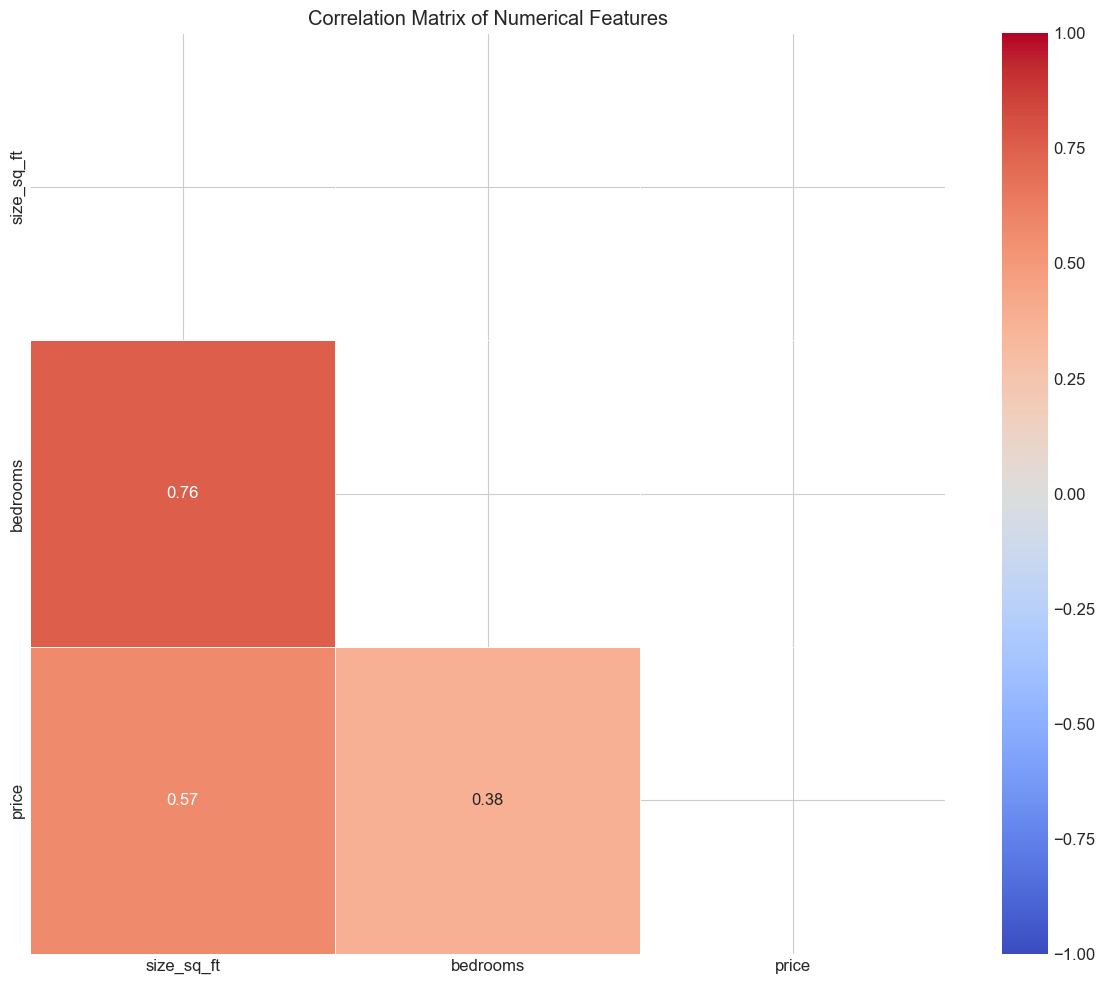

Top correlations with price:


price         1.000000
size_sq_ft    0.570750
bedrooms      0.379972
Name: price, dtype: float64

In [15]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    # Include rent in correlation analysis if it exists
    if 'price' in df.columns:
        corr_cols = numerical_cols + ['price']
    else:
        corr_cols = numerical_cols
        
    corr_matrix = df[corr_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # If rent exists, show top correlations with rent
    if 'price' in df.columns:
        price_corr = corr_matrix['price'].sort_values(ascending=False)
        print("Top correlations with price:")
        display(price_corr)

## 6. Scatter Plots for Key Relationships

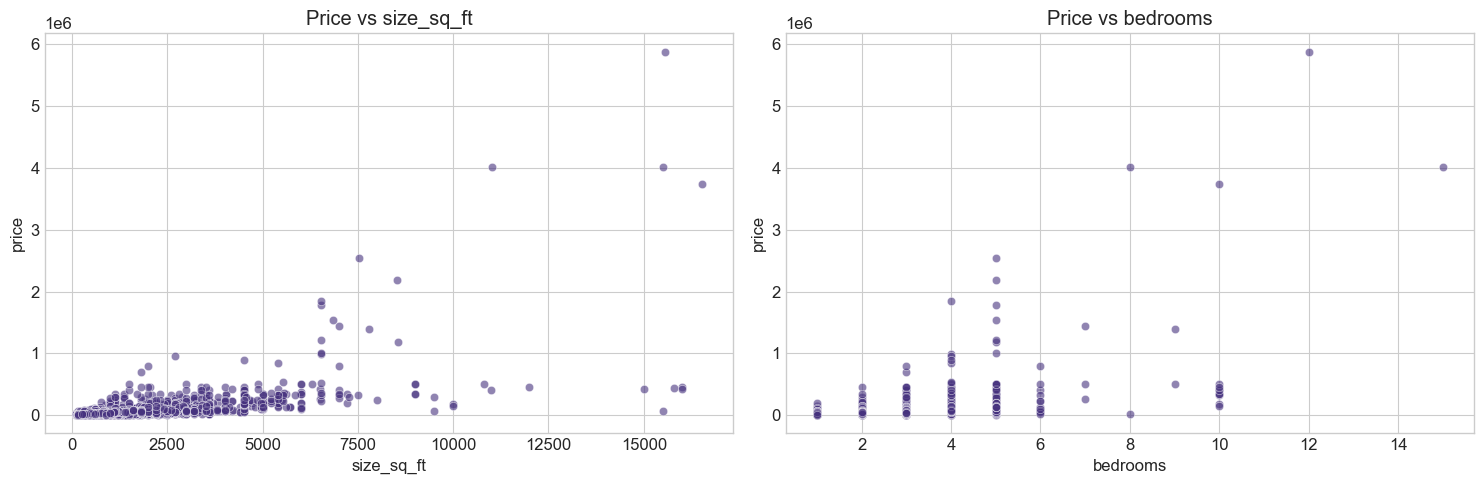

In [16]:
# Scatter plots for top correlated features with rent
if 'price' in df.columns and len(numerical_cols) > 0:
    # Get top 3 correlated features with price (excluding price itself)
    price_corr = df[numerical_cols + ['price']].corr()['price'].sort_values(ascending=False)
    top_features = price_corr[1:4].index.tolist()  # Skip the first one which is price itself
    
    if len(top_features) > 0:
        fig, axes = plt.subplots(1, len(top_features), figsize=(15, 5))
        if len(top_features) == 1:
            axes = [axes]  # Make it iterable if there's only one subplot
            
        for i, feature in enumerate(top_features):
            sns.scatterplot(x=feature, y='price', data=df, alpha=0.6, ax=axes[i])
            axes[i].set_title(f'Price vs {feature}')
            
        plt.tight_layout()
        plt.show()